In [1]:
from dask.distributed import Client, progress
import dask.array as da
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='8GB')
client

Client Scheduler: inproc://130.116.150.128/55610/1 Dashboard: http://localhost:8787/status,Cluster Workers: 1 Cores: 4 Memory: 8.00 GB


# Some very basic understanding of DASK arrays

In [83]:
x = da.random.random((4, 4), chunks=(2, 1))
print x.compute()

[[ 0.83588397  0.77060329  0.73417661  0.21244917]
 [ 0.80087883  0.58909949  0.99756255  0.1992009 ]
 [ 0.82567876  0.41394463  0.06419519  0.37009473]
 [ 0.90152551  0.29633445  0.65933836  0.24666833]]


### Print all elements from the i-th row of the Array

In [3]:
irow = 4
u = x[irow-1:irow,:]
u = u.persist()
print u.compute()

[[ 0.64066071  0.5510822   0.70211527  0.10234037]]


### Print all elements from j-th column of the Array 

In [4]:
icol = 2
v = x[:,icol-1:icol]
v = v.persist()
print v.compute()

[[ 0.18249727]
 [ 0.53301563]
 [ 0.11348666]
 [ 0.5510822 ]]


### Print n_row:m_row && i_col:j_col elements from the Array

In [5]:
n_row=2
m_row=4
i_col=1
j_col=4
w = x[n_row:m_row,i_col:j_col]
w = w.persist()
print w.compute()

[[ 0.11348666  0.57107973  0.60357924]
 [ 0.5510822   0.70211527  0.10234037]]


### Print the element (i,j) of the Array

In [6]:
i=0
j=3
z = x[i,j]
print z.compute()

0.415458311501


### Compute Mean of ALL elements of i-th row: 

In [7]:
i=3
mu = x[i-1:i,:]
print mu.compute()
print "Mean=",mu.mean(axis=1).compute()
print " Sum=",mu.sum(axis=1).compute()
#axis=1 => mean of columns
#axis=0 => mean of rows

[[ 0.80311684  0.11348666  0.57107973  0.60357924]]
Mean= [ 0.52281562]
 Sum= [ 2.09126247]


### Compute Mean of ALL elements of j-th column: 

In [8]:
j=3
mu = x[:,j-1:j]
print mu.compute()
print "Mean=",mu.mean(axis=0).compute()
print " Sum=",mu.sum(axis=0).compute()

[[ 0.57231652]
 [ 0.09193503]
 [ 0.57107973]
 [ 0.70211527]]
Mean= [ 0.48436163]
 Sum= [ 1.93744654]


In [9]:
print x.compute()

[[ 0.36429148  0.18249727  0.57231652  0.41545831]
 [ 0.03519708  0.53301563  0.09193503  0.69914157]
 [ 0.80311684  0.11348666  0.57107973  0.60357924]
 [ 0.64066071  0.5510822   0.70211527  0.10234037]]


### Compute Mean/Sum across Rows/Columns:

In [10]:
print "MeanRows=",x.sum(axis=1).compute()
print "MeanCols=",x.sum(axis=0).compute()

MeanRows= [ 1.53456358  1.35928931  2.09126247  1.99619855]
MeanCols= [ 1.84326611  1.38008176  1.93744654  1.8205195 ]


# Let's load a FITS image cube now

In [11]:
from astropy.io import fits as aiof

In [12]:
fitsfile='images/sn1006.bm25.fits'
f=aiof.open(fitsfile,mode='readonly')

In [13]:
print aiof.info(fitsfile)

Filename: images/sn1006.bm25.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      66   (2560, 2560, 1, 288)   float32   
None


### get the header information of the primary extension

In [14]:
#Print entire header for extension 0
#h=aiof.getheader(fitsfile,ext=0)
#print h

### Get relevant information from relevant header (dimensions and sizes of the image) 

In [15]:
import numpy as np
hduNum=0
maxdim=100
naxes = np.zeros(maxdim,dtype='int')
crval = np.zeros(maxdim,dtype='float')
cdelt = np.zeros(maxdim,dtype='float')
crpix = np.zeros(maxdim,dtype='int')
ctype = np.zeros(maxdim,dtype='U8')
cunit = np.zeros(maxdim,dtype='U8')
naxis = aiof.getval(fitsfile,'NAXIS')
for iaxis in range(1,naxis+1):
        # Get the Naxis values:
        string = 'naxis'+str(iaxis)
        tmpnum = aiof.getval(fitsfile,string,ext=hduNum)
        naxes[iaxis] = tmpnum
        
        # Get the coordinate reference value: 
        string = 'crval'+str(iaxis)
        tmpnum = aiof.getval(fitsfile,string,ext=hduNum)
        crval[iaxis] = tmpnum
        
        # Get the coordinate reference pixel: 
        string = 'crpix'+str(iaxis)
        tmpnum = aiof.getval(fitsfile,string,ext=hduNum)
        crpix[iaxis] = tmpnum
        
        # Get the coordinate increment values: 
        string = 'cdelt'+str(iaxis)
        tmpnum = aiof.getval(fitsfile,string,ext=hduNum)
        cdelt[iaxis] = tmpnum
        
        # Get the Ctypes: 
        string = 'ctype'+str(iaxis)
        tmpstr = aiof.getval(fitsfile,string,ext=hduNum)
        ctype[iaxis] = tmpstr
        
        # Get the Units: 
        string = 'cunit'+str(iaxis)
        tmpstr = aiof.getval(fitsfile,string,ext=hduNum)
        cunit[iaxis] = tmpstr
        
simple = aiof.getval(fitsfile,'SIMPLE')
bitpix = aiof.getval(fitsfile,'BITPIX')
restfreq = aiof.getval(fitsfile,'RESTFRQ')
specsys = aiof.getval(fitsfile,'SPECSYS')
bmin = aiof.getval(fitsfile,'BMIN')
bmaj = aiof.getval(fitsfile,'BMAJ')
bpa = aiof.getval(fitsfile,'BPA')
btype = aiof.getval(fitsfile,'BTYPE')
bunit = aiof.getval(fitsfile,'BUNIT')
bzero = aiof.getval(fitsfile,'BZERO')
bscale = aiof.getval(fitsfile,'BSCALE')
timeSys = aiof.getval(fitsfile,'TIMESYS')
origin = aiof.getval(fitsfile,'ORIGIN')
date = aiof.getval(fitsfile,'DATE')




print "Naxis: ",naxis
for iaxis in range(1,naxis+1):
        string1 = 'ctype'+str(iaxis)
        string2 = 'naxis'+str(iaxis)
        print string2,":",ctype[iaxis],";",naxes[iaxis]
        print "(CRpix,CRval,CDelt,Unit) ",crpix[iaxis],",",crval[iaxis],",",cdelt[iaxis],",",cunit[iaxis]
        print " " 

print " Simple:",simple
print " BitPix:",bitpix
print "RESTFRQ:",restfreq
print "SPECSYS:",specsys
print "   BMIN:",bmin
print "   BMAJ:",bmaj
print "    BPA:",bpa
print "  BTYPE:",btype
print "  BUNIT:",bunit
print " BSCALE:",bscale
print "  BZERO:",bzero
print " ORIGIN:",origin
print "TIMESYS:",timeSys
print "   DATE:",date

Naxis:  4
naxis1 : RA---SIN ; 2560
(CRpix,CRval,CDelt,Unit)  1281 , 225.33375 , -0.000833333333333 , deg
 
naxis2 : DEC--SIN ; 2560
(CRpix,CRval,CDelt,Unit)  1281 , -39.9920194444 , 0.000833333333333 , deg
 
naxis3 : STOKES ; 1
(CRpix,CRval,CDelt,Unit)  1 , 1.0 , 1.0 , 
 
naxis4 : FREQ ; 288
(CRpix,CRval,CDelt,Unit)  1 , 744990740.783 , 999999.972 , Hz
 
 Simple: True
 BitPix: -32
RESTFRQ: 1420405751.79
SPECSYS: TOPOCENT
   BMIN: 0.00304620788522
   BMAJ: 0.00405257375405
    BPA: 85.7484058568
  BTYPE: Intensity
  BUNIT: Jy/beam
 BSCALE: 1.0
  BZERO: 0.0
 ORIGIN: ASKAPSoft
TIMESYS: UTC
   DATE: 2018-12-14T12:49:38.095000


### Read the relevant Image and convert it to a dask array 

In [16]:
hduNumber=0
Cube=aiof.getdata(fitsfile,ext=hduNumber)

In [73]:
print Cube.shape

(288, 1, 2560, 2560)


In [82]:
import dask.array as da
ichan = 100
dimage = da.from_array(Cube[ichan,0,:,:], chunks=(100, 100))

result = dimage.sum()
print(result)
print(" Sum: ",result.compute())
print("Mean: ",dimage.mean().compute())
print(" Std: ",dimage.std().compute())
print(" Min: ",dimage.min().compute())
print(" Max: ",dimage.max().compute())
print(" Med: ",dimage.med().compute())

dask.array<sum-aggregate, shape=(), dtype=float32, chunksize=()>
(' Sum: ', 88.308594)
('Mean: ', 1.3474822e-05)
(' Std: ', 0.0035388703)
(' Min: ', -0.016864141)
(' Max: ', 2.0119109)


AttributeError: 'Array' object has no attribute 'med'

### Plotting

In [19]:
%matplotlib inline
import aplpy
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

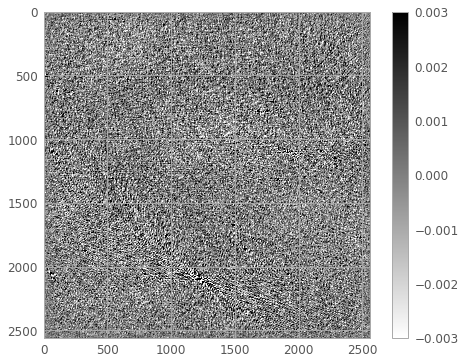

In [20]:
plt.figure()
plt.imshow(image, cmap='gray_r',vmin=-0.003,vmax=0.003)
#plt.clim(-0.001,0.005)
plt.colorbar()

# Let us now take up some examples

### A. Compute requires ALL pixels of the plane z=iz
#### 1. Compute the rms of RA-Dec planes for all Frequency Channels
##### We explore two methods here -- One using Dask arrays and the std function of Dask and the other using numpy 
Questions to address: 
* Where does the reading of the data take place? 
* The reading may be done at the lowest level  -- reading data is part of the compute
* The reading of the data may be done up-front, and appropriate part of it is distributed to workers. Will be meaningful when master has sufficient memory. 

In [21]:
import random
import dask
import numpy as np 
import time

# Function to compute the rms of an image: we convert the array in to a Dask array here.
def imrms(inCube,chan,stoke):
    im = da.from_array(inCube[chan,stoke,:,:], chunks=(1000,1000))
    im = im.persist()
    time.sleep(random.random())
    return im.std()

# Function to compute the rms of an image: we use numpy array here.
def imrms_np(inCube,chan,stoke):
    im = inCube[chan,stoke,:,:]
    time.sleep(random.random())
    return np.std(im)

In [22]:
bchan=100
echan=150
maxchan=300
chan_arr = np.arange(bchan,echan)

In [23]:
%%time 
# Use Dask Array Method to compute rms of images:
results = np.zeros(maxchan)
istoke=0
ichan = 0
for chan in chan_arr:
    ichan = ichan + 1 
    result = imrms(Cube,chan,istoke)
    print chan, result.compute()
    
    #results.append(result)
    results[chan] = result
print "nchan: ",echan - bchan + 1
print results[bchan:echan]
print "Method Used: Dask Array"

100 0.00353887
101 0.00352508
102 0.00351298
103 0.00352197
104 0.00352909
105 0.0035019
106 0.00351394
107 0.00349868
108 0.00348047
109 0.00348061
110 0.00346672
111 0.00345065
112 0.00344615
113 0.00342724
114 0.00340981
115 0.00339767
116 0.00337812
117 0.00336637
118 0.00336045
119 0.00334762
120 0.00334371
121 0.00333396
122 0.0033463
123 0.00332091
124 0.00331991
125 0.00332129
126 0.00330855
127 0.00330893
128 0.00330662
129 0.00329115
130 0.00329002
131 0.00326461
132 0.00326002
133 0.00324412
134 0.0032293
135 0.0032136
136 0.00319186
137 0.00317525
138 0.00315737
139 0.00314688
140 0.00312505
141 0.00311511
142 0.00310608
143 0.00311986
144 0.00312276
145 0.00311419
146 0.00311665
147 0.00312427
148 0.00313682
149 0.00314231
nchan:  51
[ 0.00353887  0.00352508  0.00351298  0.00352197  0.00352909  0.0035019
  0.00351394  0.00349868  0.00348047  0.00348061  0.00346672  0.00345065
  0.00344615  0.00342724  0.00340981  0.00339767  0.00337812  0.00336637
  0.00336045  0.00334762 

In [24]:
%%time 
# Use Numpy Array Method to compute rms of images:
results = np.zeros(maxchan)
istoke=0
ichan = 0
for chan in chan_arr:
    ichan = ichan + 1 
    result = imrms_np(Cube,chan,istoke)
    print chan, result
    #results.append(result)
    results[chan] = result
print "nchan: ",echan - bchan + 1
print results[bchan:echan]
print "Method Used: Numpy Array"

100 0.00353887
101 0.00352508
102 0.00351298
103 0.00352197
104 0.00352909
105 0.0035019
106 0.00351394
107 0.00349868
108 0.00348047
109 0.00348061
110 0.00346672
111 0.00345065
112 0.00344615
113 0.00342724
114 0.00340981
115 0.00339767
116 0.00337812
117 0.00336637
118 0.00336045
119 0.00334762
120 0.0033437
121 0.00333396
122 0.0033463
123 0.00332091
124 0.00331991
125 0.00332129
126 0.00330855
127 0.00330892
128 0.00330662
129 0.00329115
130 0.00329002
131 0.00326461
132 0.00326002
133 0.00324412
134 0.0032293
135 0.0032136
136 0.00319186
137 0.00317525
138 0.00315737
139 0.00314688
140 0.00312505
141 0.00311511
142 0.00310608
143 0.00311986
144 0.00312276
145 0.00311419
146 0.00311665
147 0.00312427
148 0.00313682
149 0.00314231
nchan:  51
[ 0.00353887  0.00352508  0.00351298  0.00352197  0.00352909  0.0035019
  0.00351394  0.00349868  0.00348047  0.00348061  0.00346672  0.00345065
  0.00344615  0.00342724  0.00340981  0.00339767  0.00337812  0.00336637
  0.00336045  0.00334762  

In [70]:
tmp = Cube[10,0,:,:]
print tmp.shape
%time np.std(tmp)

(2560, 2560)
CPU times: user 20.6 ms, sys: 5.61 ms, total: 26.2 ms
Wall time: 23.1 ms


0.0046327752

In [71]:
dtmp = da.from_array(Cube[10,0,:,:], chunks=(100,100))
print dtmp.shape
%time dtmp.std()

(2560, 2560)
CPU times: user 5.95 ms, sys: 1.62 ms, total: 7.57 ms
Wall time: 6.29 ms


dask.array<sqrt, shape=(), dtype=float32, chunksize=()>

In [72]:
s = tmp.std()
print s

ds = dtmp.std()
print ds.compute()

0.00463278
0.00463278
